In [9]:
target_rd = 3000

import pandas as pd
df_cd4 = pd.read_csv('output_CD4.csv',index_col=0)
df_cd8 = pd.read_csv('output_CD8.csv',index_col=0)
df_cd8

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
AAACCTGAGACAATAC.4-BC,0.365487,0.133060,-0.027756,0.329715,0.443917,1.859913,0.341392
AAACCTGAGACTAGAT.4-BC,0.390808,0.157700,-0.119247,0.371589,0.493110,2.152676,0.382631
AAACCTGAGCGATATA.2-BC,0.334655,0.070902,-0.123916,0.278486,0.336283,2.098304,0.438263
AAACCTGCAATGGACG.3-BC,0.363361,0.039525,-0.109586,0.162731,0.288162,1.738734,0.164228
AAACCTGGTCGGCTCA.2-BC,0.471974,0.257737,0.095594,0.395807,0.585422,1.688048,0.199670
...,...,...,...,...,...,...,...
TTTACTGAGATAGGAG.32-FTC,0.353857,0.129314,-0.017356,0.171989,0.383217,1.958259,0.186654
TTTATGCGTGAGGCTA.32-FTC,0.297639,0.081241,-0.075966,0.256300,0.557306,1.949168,0.215569
TTTCCTCTCCATGCTC.32-FTC,0.468681,0.258227,0.096262,0.330448,0.754956,1.386780,0.196828
TTTGGTTGTCTCAACA.32-FTC,0.617495,0.446743,0.321791,0.500893,0.620627,1.847300,0.213042


In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300        # display DPI
mpl.rcParams['savefig.dpi'] = 300       # file export DPI


pos_sigs_CD8 = [
    "CD8_Lowery_pos_243g", 
    "CD8_Oliveira_TTE_100g", 
    "CD8_Oliveira_pos_74g", 
    "CD8_Yost_CD8_Exh_100g", 
    "CD8_ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    "CD8_ave_Hanada_neg_5g", 
    "CD8_ave_Oliveira_virus_26g"
]

pos_sigs_CD4 = [
    "CD4_ave_Hanada_pos_9g", 
    "CD4_Caushi_Tfh2_66g", 
    "CD4_Lowery_pos_40g", 
    "CD4_Oh_CXCL13_50g"
]
neg_sigs_CD4 = [
    "CD4_Lowery_neg_37g", 
    "CD4_ave_Hanada_neg_4g"
]


def classify_cells(df, cell_type, pos_sigs, neg_sigs):
    sub = df.copy()
    cols = pos_sigs + neg_sigs

    # z‐score the signatures _within_ this subset
    z_pos = sub[pos_sigs].apply(zscore)
    z_neg = sub[neg_sigs].apply(zscore)

    # compute mean “pos” and “neg” scores
    sub[f"pos_score_{cell_type}"] = z_pos.mean(axis=1)
    sub[f"neg_score_{cell_type}"] = z_neg.mean(axis=1)

    # pick cutoffs (here: median)
    pos_cut = sub[f"pos_score_{cell_type}"].median()
    neg_cut = sub[f"neg_score_{cell_type}"].median()

    # classify per cell
    sub[f"cancer_reactive_per_cell_{cell_type}"] = (
        (sub[f"pos_score_{cell_type}"] >  pos_cut) &
        (sub[f"neg_score_{cell_type}"] <  neg_cut)
    )

    return sub, pos_cut, neg_cut

# run it for each cell‐type
cd8_called,pos_cut_CD8, neg_cut_CD8= classify_cells(df_cd8, "CD8", pos_sigs_CD8, neg_sigs_CD8)
cd4_called,pos_cut_CD4, neg_cut_CD4 = classify_cells(df_cd4, "CD4", pos_sigs_CD4, neg_sigs_CD4)
cd8_called

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGACAATAC.4-BC,0.365487,0.133060,-0.027756,0.329715,0.443917,1.859913,0.341392,-0.143478,0.388958,False
AAACCTGAGACTAGAT.4-BC,0.390808,0.157700,-0.119247,0.371589,0.493110,2.152676,0.382631,-0.069629,0.957777,False
AAACCTGAGCGATATA.2-BC,0.334655,0.070902,-0.123916,0.278486,0.336283,2.098304,0.438263,-0.664218,1.124400,False
AAACCTGCAATGGACG.3-BC,0.363361,0.039525,-0.109586,0.162731,0.288162,1.738734,0.164228,-0.874129,-0.535169,False
AAACCTGGTCGGCTCA.2-BC,0.471974,0.257737,0.095594,0.395807,0.585422,1.688048,0.199670,0.761239,-0.450471,True
...,...,...,...,...,...,...,...,...,...,...
TTTACTGAGATAGGAG.32-FTC,0.353857,0.129314,-0.017356,0.171989,0.383217,1.958259,0.186654,-0.471484,-0.145195,False
TTTATGCGTGAGGCTA.32-FTC,0.297639,0.081241,-0.075966,0.256300,0.557306,1.949168,0.215569,-0.482366,-0.032965,False
TTTCCTCTCCATGCTC.32-FTC,0.468681,0.258227,0.096262,0.330448,0.754956,1.386780,0.196828,0.805368,-0.865489,True
TTTGGTTGTCTCAACA.32-FTC,0.617495,0.446743,0.321791,0.500893,0.620627,1.847300,0.213042,2.003157,-0.180033,True


In [11]:
df_combined = pd.concat([cd4_called, cd8_called],
                     axis=0,          # stack rows
                     ignore_index=False,
                     sort=False)
df_combined

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGAACTGTA.2-BC,0.158727,0.654721,0.189109,-0.084485,0.790394,1.304025,-0.090702,0.675237,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGTATCGAA.2-BC,0.219560,0.629695,0.059484,-0.060319,0.849184,2.173659,-0.093024,1.557865,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCACAACTGT.3-BC,-0.006013,0.545825,-0.019754,-0.058369,0.664936,1.519322,-0.903224,0.464630,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCATTTGCCC.4-BC,0.215635,0.580924,0.431521,-0.071719,0.789093,2.242283,0.514248,1.431980,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGGTGATGCCC.2-BC,-0.006811,0.603167,0.110774,-0.109491,0.732868,2.162387,-0.696906,1.434223,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACTGAGATAGGAG.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.353857,0.129314,-0.017356,0.171989,0.383217,1.958259,0.186654,-0.471484,-0.145195,False
TTTATGCGTGAGGCTA.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.297639,0.081241,-0.075966,0.256300,0.557306,1.949168,0.215569,-0.482366,-0.032965,False
TTTCCTCTCCATGCTC.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468681,0.258227,0.096262,0.330448,0.754956,1.386780,0.196828,0.805368,-0.865489,True
TTTGGTTGTCTCAACA.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.617495,0.446743,0.321791,0.500893,0.620627,1.847300,0.213042,2.003157,-0.180033,True


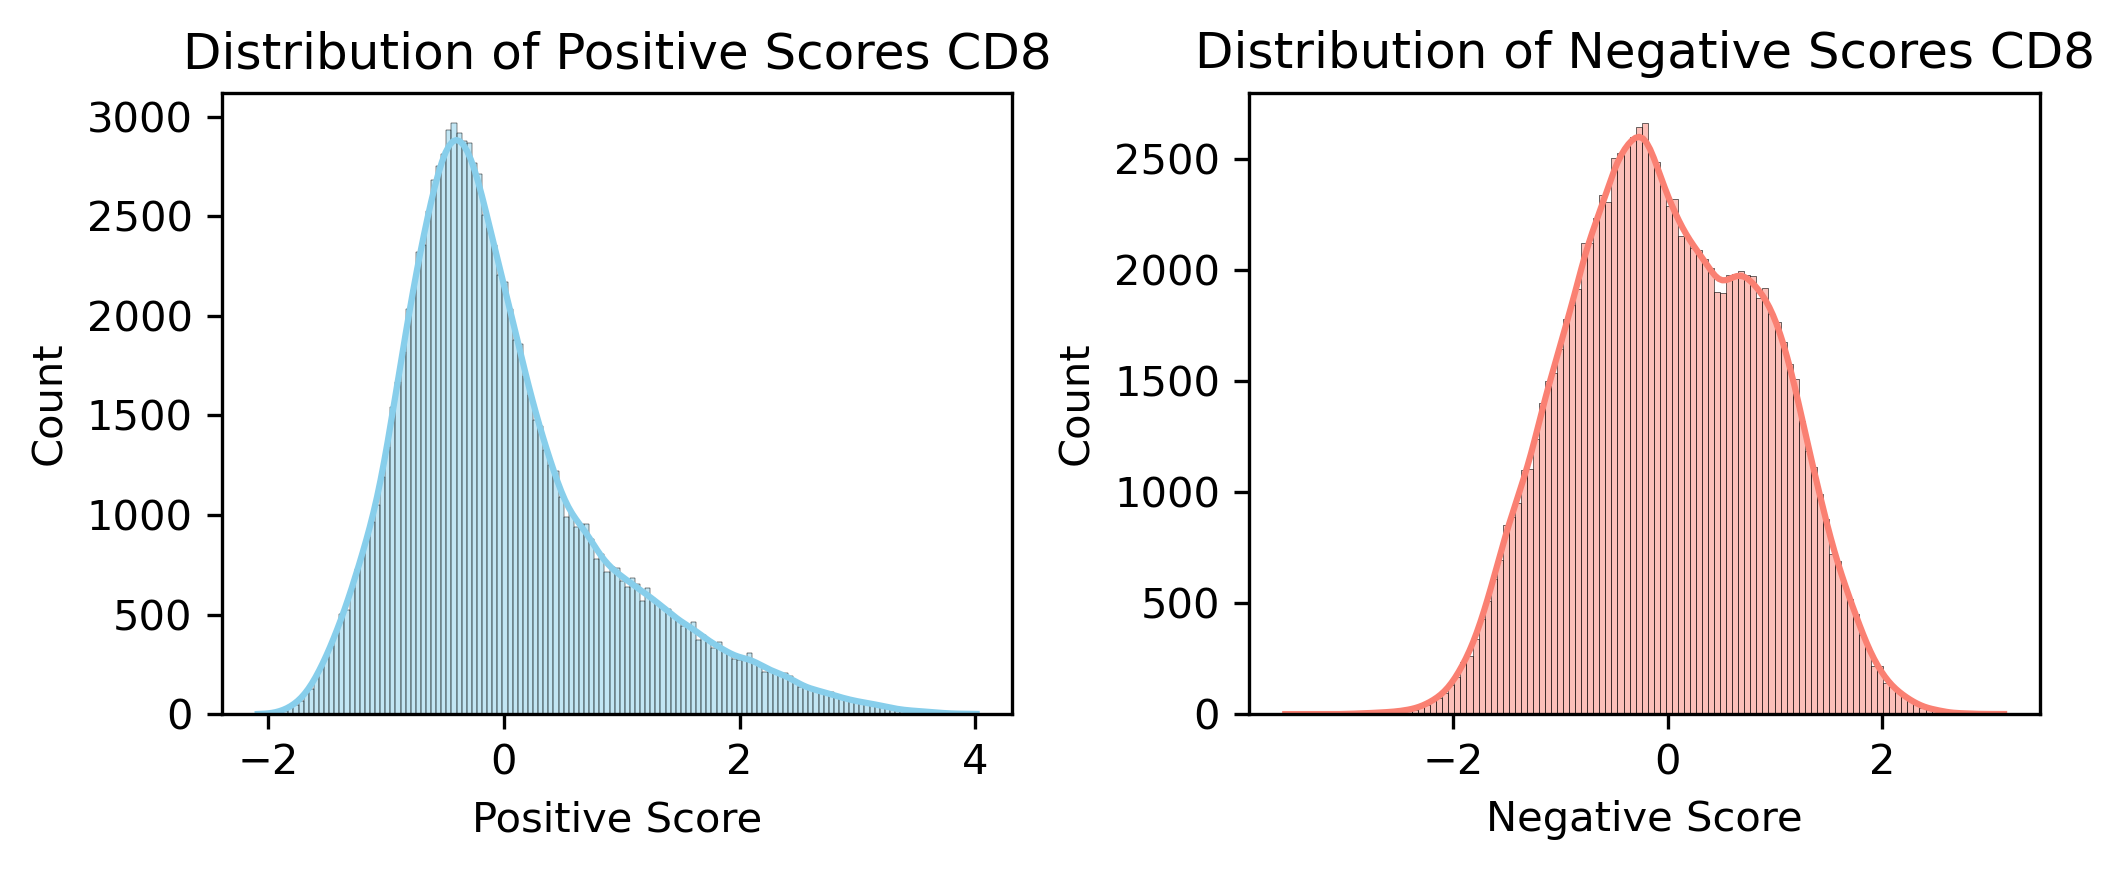

In [12]:
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.histplot(cd8_called['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd8_called['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

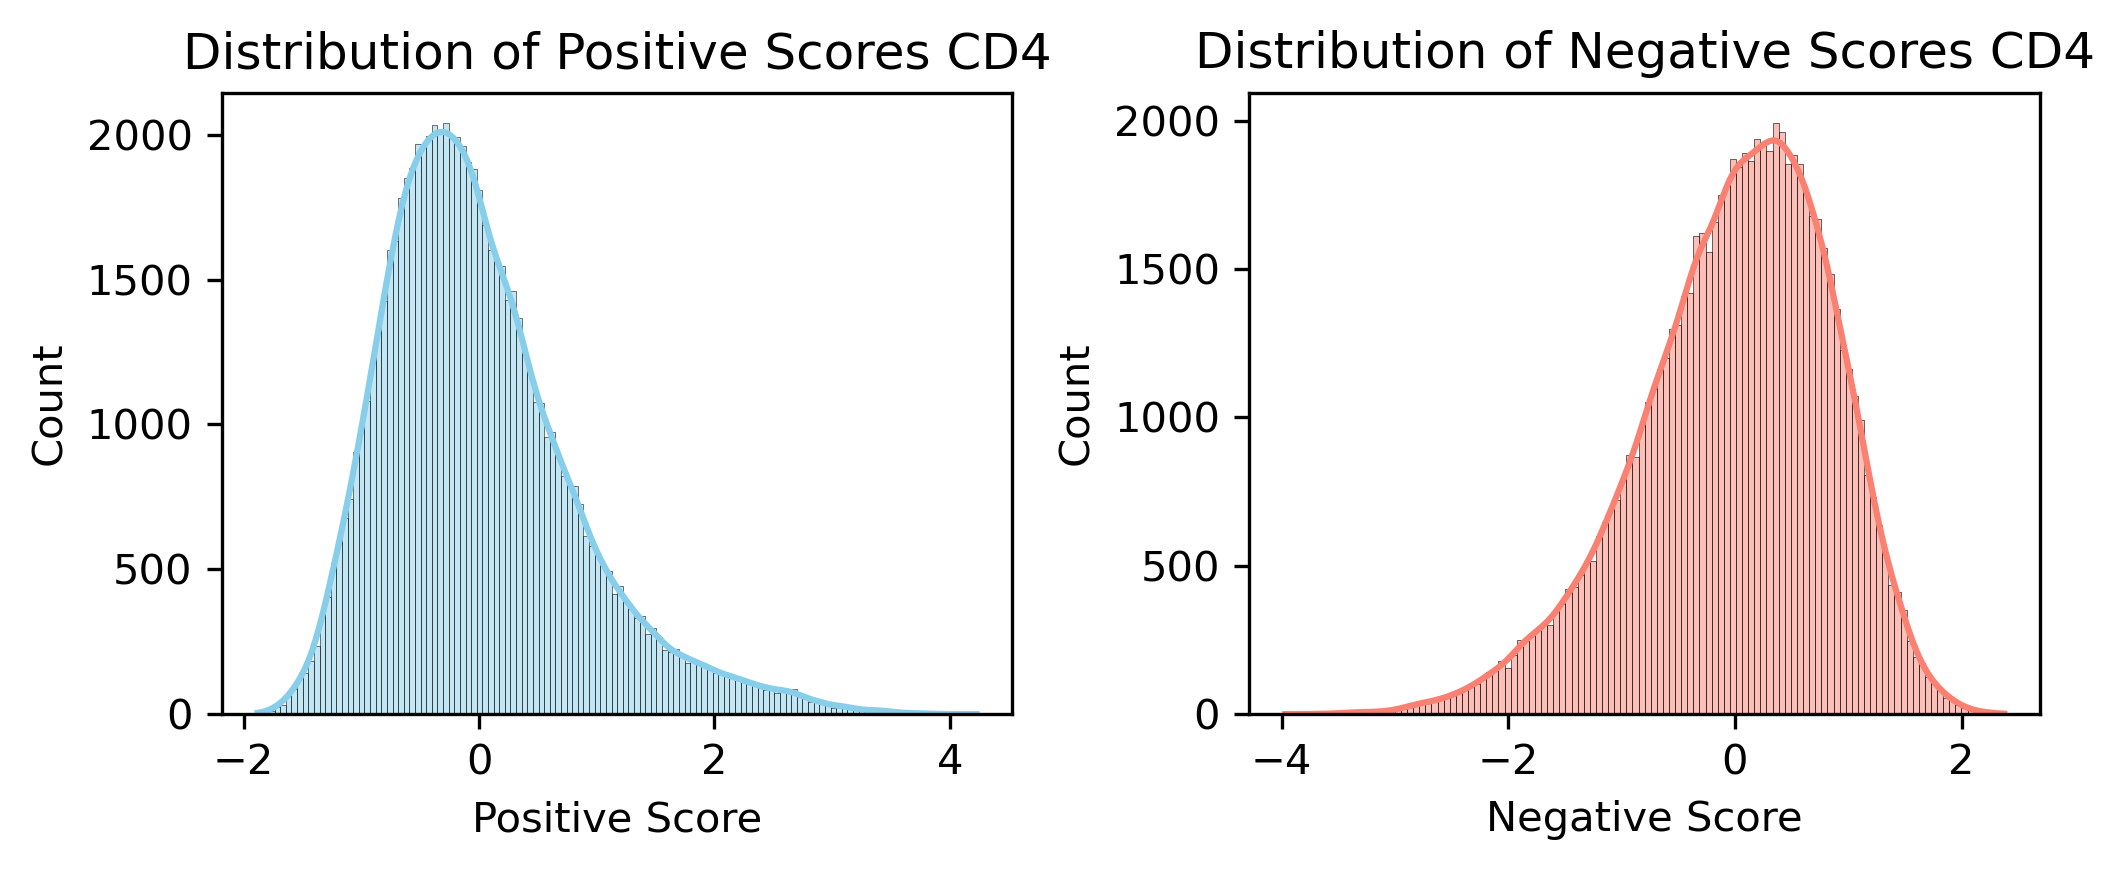

In [13]:
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.histplot(cd4_called['pos_score_CD4'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD4')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd4_called['neg_score_CD4'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD4')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

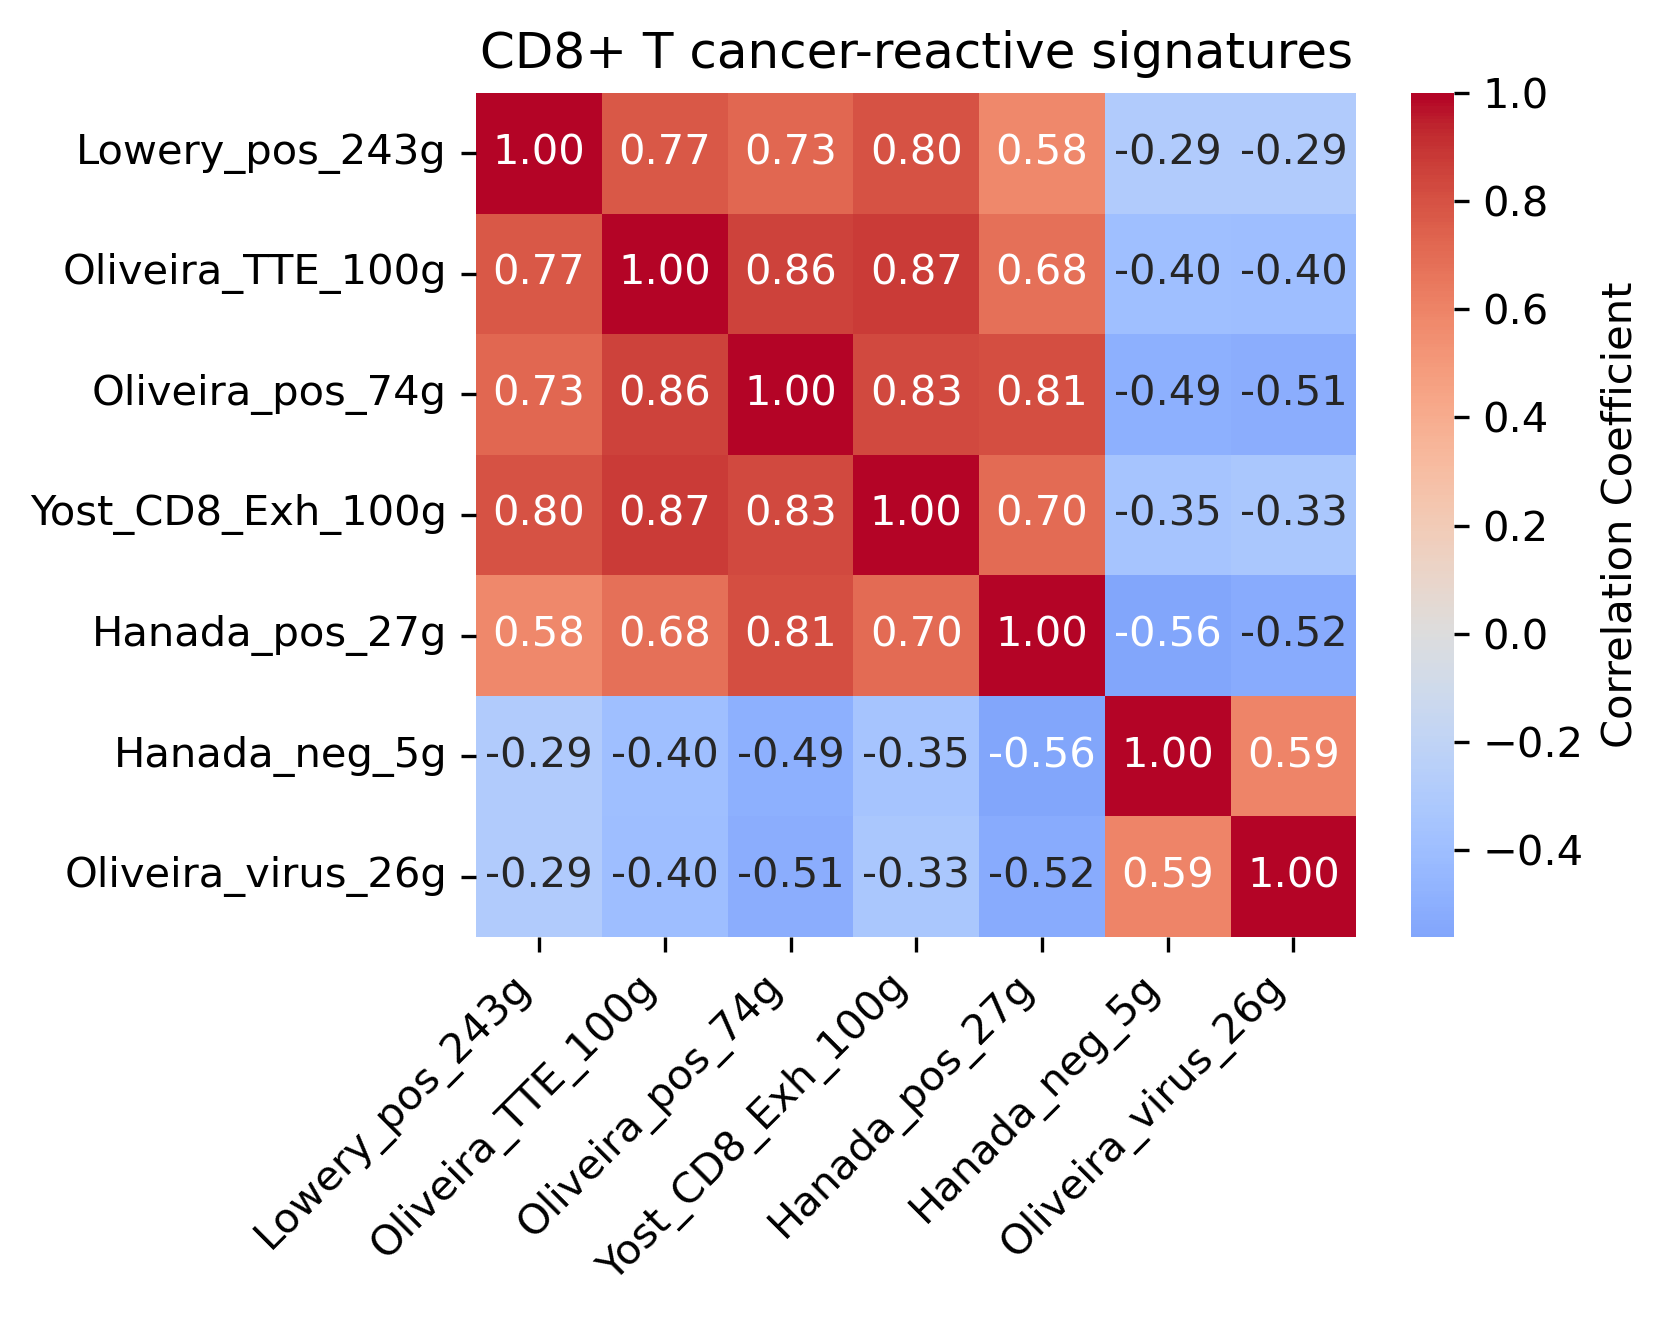

In [14]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd8_called[all_sigs_CD8].corr()
corr_matrix.index = corr_matrix.index.str.replace(r"^CD8_ave_|^CD8_", "", regex=True)
corr_matrix.columns = corr_matrix.columns.str.replace(r"^CD8_ave_|^CD8_", "", regex=True)


# Create a heatmap of the correlation matrix
plt.figure(figsize=(5.6, 4.5))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("CD8+ T cancer-reactive signatures")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

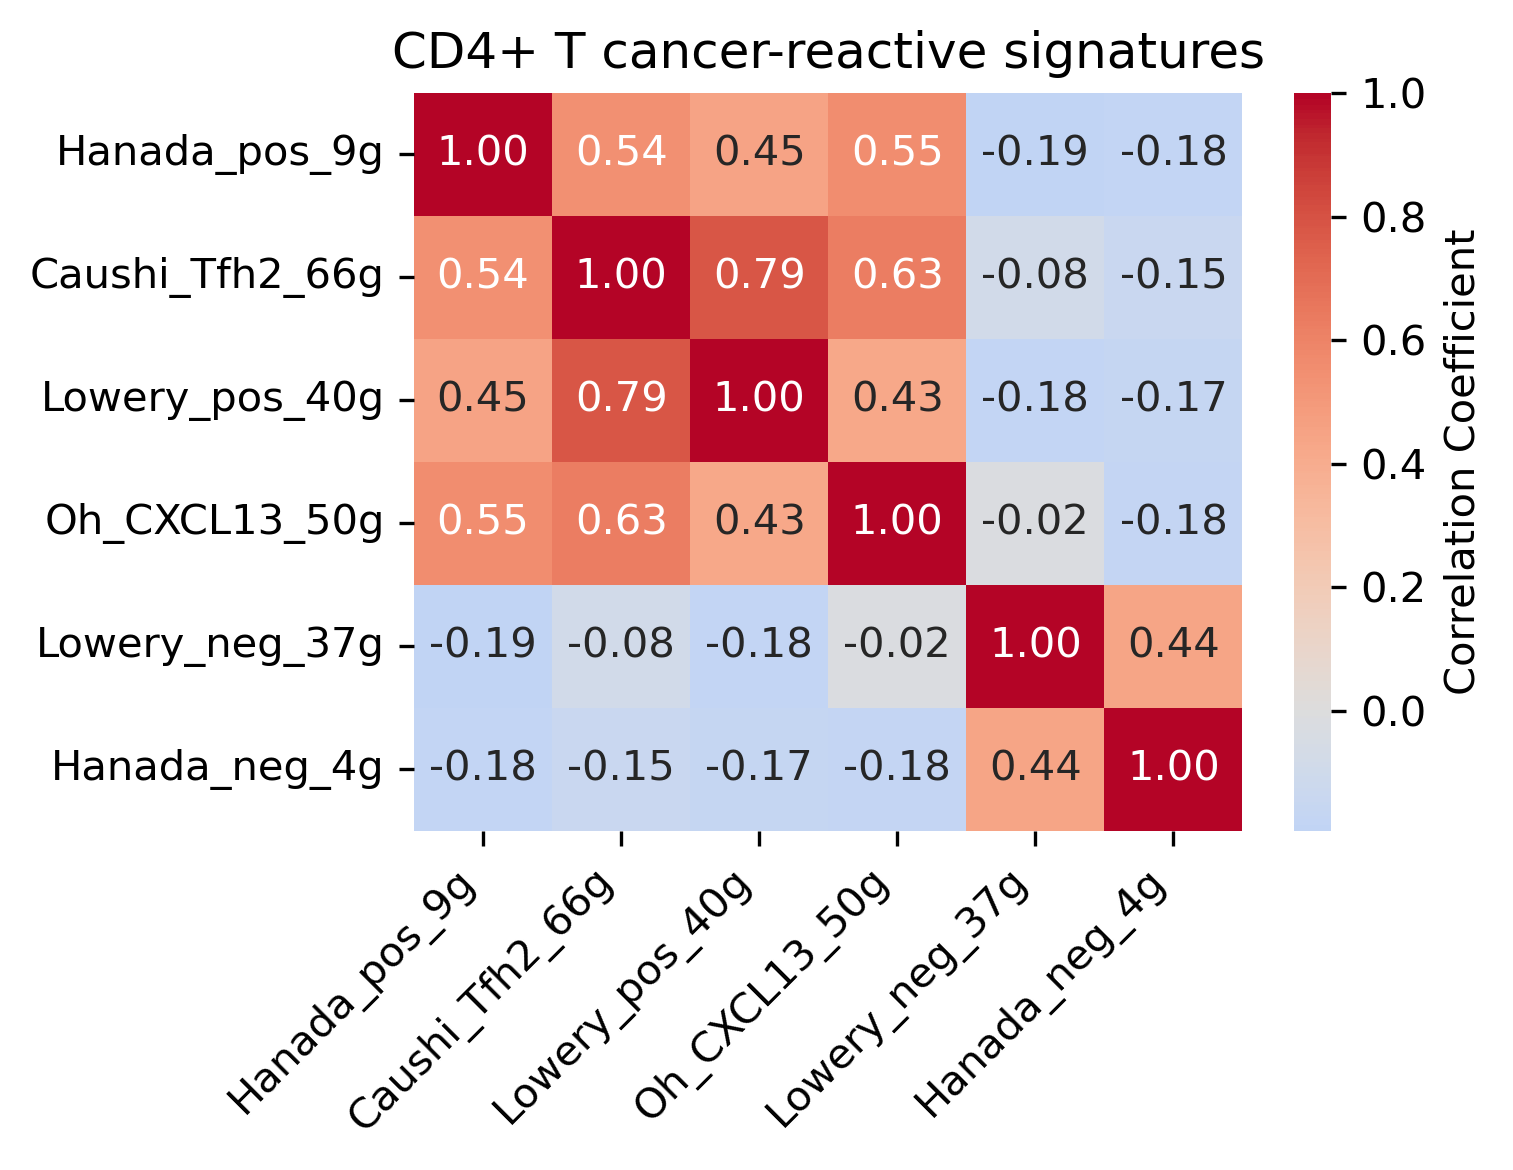

In [15]:
# Combine the lists to get all columns
all_sigs_CD4 = pos_sigs_CD4 + neg_sigs_CD4

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd4_called[all_sigs_CD4].corr()
corr_matrix.index = corr_matrix.index.str.replace(r"^CD4_ave_|^CD4_", "", regex=True)
corr_matrix.columns = corr_matrix.columns.str.replace(r"^CD4_ave_|^CD4_", "", regex=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(5.1, 4))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("CD4+ T cancer-reactive signatures")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Clustering based on signature genes

In [16]:
import pickle
with open("../data/signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("../data/signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})

del sigs_CD4['Jansen_TermDiff_73g']
del sigs_CD8['Lowery_neg_99g']

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [17]:
import scanpy as sc
import glob
import os

def read_table(path, **kwargs):
    """Convenience for gzipped TSV with rownames in col 0."""
    return pd.read_csv(path, sep="\t", index_col=0, compression="gzip", **kwargs)

DATA_DIR = "GSE156728"

meta_fp = os.path.join(DATA_DIR, "GSE156728_metadata.txt.gz")
meta = read_table(meta_fp)

l = ['BC','BCL','ESCA','MM','PACA','RC','THCA','UCEC','OV','FTC']

# List to store the processed AnnData objects
adatas = []

for i in l:
    df_path = glob.glob(os.path.join(DATA_DIR, f"*{i}_10X.CD8.counts.txt.gz"))[0]
    df = read_table(df_path)
    
    adata = sc.AnnData(df.T)
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    adata.obs = adata.obs.join(meta)
    print(adata)

    new_index = [bc + f"-{i}" for bc in adata.obs.index]
    adata.obs.index = new_index

    sc.pp.normalize_total(adata, target_sum=target_rd)
    sc.pp.log1p(adata)  # log transform

    # Append the AnnData object to the list
    adatas.append(adata)

# Concatenate all adatas into one single AnnData object
adata_CD8 = sc.concat(adatas, label='batch', keys=l, join='inner')

AnnData object with n_obs × n_vars = 4291 × 24148
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 3482 × 28855
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 12526 × 24148
    obs: 'n_g

In [18]:
adatas = []

for i in l:
    df_path = glob.glob(os.path.join(DATA_DIR, f"*{i}_10X.CD4.counts.txt.gz"))[0]
    df = read_table(df_path)
    
    adata = sc.AnnData(df.T)
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    adata.obs = adata.obs.join(meta)
    print(adata)

    new_index = [bc + f"-{i}" for bc in adata.obs.index]
    adata.obs.index = new_index

    median_depth = np.median(adata.obs['total_counts'].values)
    sc.pp.normalize_total(adata, target_sum=median_depth)
    sc.pp.log1p(adata)  # log transform

    # Append the AnnData object to the list
    adatas.append(adata)

# Concatenate all adatas into one single AnnData object
adata_CD4 = sc.concat(adatas, label='batch', keys=l, join='inner')

AnnData object with n_obs × n_vars = 3063 × 24148
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 4237 × 28855
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 12358 × 24148
    obs: 'n_g

In [19]:
print(adata_CD8.shape)
print(adata_CD4.shape)


(109089, 24148)
(74824, 24148)


In [20]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
all_genes_flat_CD4 = [item for sublist in sigs_CD4.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))
subset_genes_CD4 = list(set(all_genes_flat_CD4))

In [21]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata_CD8.var.index):
        matched_genes_CD8.append(s1)
for s1 in subset_genes_CD4:
    if s1 in list(adata_CD4.var.index):
        matched_genes_CD4.append(s1)    
# Print match info
print(f" {len(matched_genes_CD4)}/{len(subset_genes_CD4)} CD4 genes are found.")
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 159/164 CD4 genes are found.
 391/396 CD8 genes are found.


In [22]:
%matplotlib inline
def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.5)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs["leiden"].rename(f"cluster_{key}")

leiden_cd4 = run_cluster(adata_concat_CD4[:, matched_genes_CD4].copy(), "CD4")
leiden_cd8 = run_cluster(adata_concat[:, matched_genes_CD8].copy(), "CD8")

clusters_wide = pd.concat([leiden_cd4, leiden_cd8], axis=1)


NameError: name 'adata_concat_CD4' is not defined

In [ ]:
merged_df = df_combined.join(clusters_wide[['cluster_CD4','cluster_CD8']])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clusters = [c for c in merged_df['cluster_CD4'].unique() if pd.notna(c)]
clusters = sorted(clusters)

# global axis limits
xmin, xmax = merged_df['pos_score_CD4'].min(), merged_df['pos_score_CD4'].max()
ymin, ymax = merged_df['neg_score_CD4'].min(), merged_df['neg_score_CD4'].max()

# layout
n = len(clusters)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4*ncols, 3*nrows),
    sharex=True, sharey=True
)

for ax, clu in zip(axes.flat, clusters):
    sub = merged_df[merged_df['cluster_CD4'] == clu]
    
    # scatter
    ax.scatter(
        sub['pos_score_CD4'],
        sub['neg_score_CD4'],
        s=1,
        alpha=0.7
    )
    
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# turn off any unused subplots
for ax in axes.flat[n:]:
    ax.axis('off')

# global labels & title
fig.supxlabel('pos_score_CD4', fontsize=14)
fig.supylabel('neg_score_CD4', fontsize=14)
fig.suptitle('CD4: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
clusters_cd8 = [c for c in merged_df['cluster_CD8'].unique() if pd.notna(c)]
clusters_cd8 = sorted(clusters_cd8)

# compute global axis limits for CD8
xmin8, xmax8 = merged_df['pos_score_CD8'].min(), merged_df['pos_score_CD8'].max()
ymin8, ymax8 = merged_df['neg_score_CD8'].min(), merged_df['neg_score_CD8'].max()

# layout: 4 columns, as many rows as needed
n8 = len(clusters_cd8)
ncols8 = 4
nrows8 = int(np.ceil(n8 / ncols8))

fig8, axes8 = plt.subplots(
    nrows8, ncols8,
    figsize=(4*ncols8, 3*nrows8),
    sharex=True, sharey=True
)

for ax, clu in zip(axes8.flat, clusters_cd8):
    sub8 = merged_df[merged_df['cluster_CD8'] == clu]
    
    # scatter
    ax.scatter(
        sub8['pos_score_CD8'],
        sub8['neg_score_CD8'],
        s=1,
        alpha=0.7
    )
    
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin8, xmax8)
    ax.set_ylim(ymin8, ymax8)

# disable unused subplots
for ax in axes8.flat[n8:]:
    ax.axis('off')

# global labels & title
fig8.supxlabel('pos_score_CD8', fontsize=14)
fig8.supylabel('neg_score_CD8', fontsize=14)
fig8.suptitle('CD8: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
merged_df["cell_type_by_cluster"] = merged_df["cluster_CD4"].notna().map({True: "CD4", False: "CD8"})

In [ ]:
merged_df["cluster"] = merged_df.apply(
    lambda r: r["cluster_CD4"] if r["cell_type_by_cluster"] == "CD4"
              else r["cluster_CD8"],
    axis=1
)

merged_df["cancer_reactive_per_cell"] = merged_df.apply(
    lambda r: r["cancer_reactive_per_cell_CD4"] if r["cell_type_by_cluster"] == "CD4"
              else r["cancer_reactive_per_cell_CD8"],
    axis=1
)

# Group by both cell_type & cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby(["cell_type_by_cluster", "cluster"])["cancer_reactive_per_cell"]
    .mean()
    .rename("reactive_fraction")
)

cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df

In [ ]:
#  threshold and collect all (cell_type, cluster) pairs above it
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs


In [ ]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if (r["cell_type_by_cluster"], r["cluster"]) in reactive_pairs
              else False,
    axis=1
)
merged_df

# Join with TCR data

In [ ]:
vdj = read_table(os.path.join(DATA_DIR,"GSE156728_10X_VDJ.merge.txt.gz"))
print("VDJ merge:", vdj.shape)
vdj

In [ ]:
# Extract the prefix from library.id
prefix = vdj['library.id'].str.split('-').str[0]

# Create new index by appending the prefix to the current index
vdj.index = vdj.index.astype(str) + '-' + prefix

In [ ]:
vdj['TCR_entry_number'] = vdj.groupby(vdj.index).cumcount()
vdj = vdj[vdj["chain"].isin(["TRA", "TRB"])]
vdj

In [ ]:
df_final = (
    merged_df
    .join(vdj)   # left‐join by index & column
)

# Set multi-index with barcode and TCR_entry_number
df_final = df_final.set_index('TCR_entry_number', append=True)
df_final

In [ ]:
out_CD4 = df_final[df_final["cell_type_by_cluster"]=='CD4']
out_CD8 = df_final[df_final["cell_type_by_cluster"]=='CD8']
out_CD8 = out_CD8.dropna(axis=1, how='all')
out_CD4 = out_CD4.dropna(axis=1, how='all')
pd.set_option('display.max_columns', None)
out_CD8

In [ ]:
out_CD8.to_csv("cell_meta_data_CD8.csv", index=True)
out_CD4.to_csv("cell_meta_data_CD4.csv", index=True)

In [ ]:
df_ab  = out_CD8.reset_index().rename(columns={'level_0':'cell_id'}).copy()

# For each cell_id × chain, grab the row with the highest UMI count
idx = df_ab.groupby(['cell_id','chain'])['umis'].idxmax()
df_best = df_ab.loc[idx]

tcr_cols = df_best.columns[17:31].tolist() 
meta_cols = [c for c in df_best.columns
             if c not in tcr_cols + ['chain','cell_id']]

print("TCR columns:")
print(tcr_cols)
print("Metadata columns:")
print(meta_cols)

# Extract metadata: take first row per cell_id
df_meta = (
    df_best
    .groupby('cell_id')[meta_cols]
    .first()
)

df_alpha = (
    df_best
    .loc[df_best['chain']=='TRA', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Alpha)')
)
df_beta = (
    df_best
    .loc[df_best['chain']=='TRB', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Beta)')
)


In [ ]:
df_final = (
    df_meta
    .join(df_alpha, how='inner')
    .join(df_beta, how='inner')
    .reset_index()
)
df_final.drop(columns='TCR_entry_number', axis=1, inplace=True)

In [ ]:
df_final

In [ ]:
df_final.to_csv("cell_meta_data_CD8_cleaned.csv", index=False)

In [ ]:
out_CD4 = pd.read_csv('cell_meta_data_CD4.csv', index_col = [0,1])
df_ab  = out_CD4.reset_index().rename(columns={'level_0':'cell_id'}).copy()

# For each cell_id × chain, grab the row with the highest UMI count
idx = df_ab.groupby(['cell_id','chain'])['umis'].idxmax()
df_best = df_ab.loc[idx]

tcr_cols = df_best.columns[16:30].tolist() 
meta_cols = [c for c in df_best.columns
             if c not in tcr_cols + ['chain','cell_id']]

print("TCR columns:")
print(tcr_cols)
print("Metadata columns:")
print(meta_cols)

# Extract metadata: take first row per cell_id
df_meta = (
    df_best
    .groupby('cell_id')[meta_cols]
    .first()
)

df_alpha = (
    df_best
    .loc[df_best['chain']=='TRA', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Alpha)')
)
df_beta = (
    df_best
    .loc[df_best['chain']=='TRB', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Beta)')
)
df_final = (
    df_meta
    .join(df_alpha, how='inner')
    .join(df_beta, how='inner')
    .reset_index()
)
df_final.drop(columns='TCR_entry_number', axis=1, inplace=True)
df_final

In [ ]:
df_final.to_csv("cell_meta_data_CD4_cleaned.csv", index=True)

# Process to get TCR Meta Data

In [ ]:
import pandas as pd
cell_data_CD8 = pd.read_csv('cell_meta_data_CD8_cleaned.csv', index_col = 0)
cell_data_CD8["cancer_reactive"] = (
    cell_data_CD8["cancer_reactive_per_cell"] 
  & cell_data_CD8["cancer_reactive_by_cluster"]
)
cell_data_CD8

In [ ]:
mask = (
    cell_data_CD8['cdr3(Beta)'].notna() & (cell_data_CD8['cdr3(Beta)'] != 'None') &
    cell_data_CD8['cdr3(Alpha)'].notna() & (cell_data_CD8['cdr3(Alpha)'] != 'None')
)
cell_data_CD8 = cell_data_CD8[mask]
cell_data_CD8

In [ ]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# ---  short aliases to match dataframe -------------------
# ------------------------------------------------------------------
A_V   = 'v_gene(Alpha)'
A_J   = 'j_gene(Alpha)'
A_CDR = 'cdr3(Alpha)'
B_V   = 'v_gene(Beta)'
B_J   = 'j_gene(Beta)'
B_CDR = 'cdr3(Beta)'

SAMPLE = 'library.id'
# ------------------------------------------------------------------
#   ---  aggregation function ------------------------------------
# ------------------------------------------------------------------
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD8' : df['pos_score_CD8'].mean(),
        'mean_neg_score_CD8' : df['neg_score_CD8'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD8
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df

In [ ]:
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])
tcr_df_sorted

In [ ]:
tcr_df_sorted.to_csv('tcr_meta_data_CD8_cells.csv',index = False)

In [ ]:
cell_data_CD4 = pd.read_csv('cell_meta_data_CD4_cleaned.csv', index_col = 0)
cell_data_CD4["cancer_reactive"] = (
    cell_data_CD4["cancer_reactive_per_cell"] 
  & cell_data_CD4["cancer_reactive_by_cluster"]
)
mask = (
    cell_data_CD4['cdr3(Beta)'].notna() & (cell_data_CD4['cdr3(Beta)'] != 'None') &
    cell_data_CD4['cdr3(Alpha)'].notna() & (cell_data_CD4['cdr3(Alpha)'] != 'None')
)
cell_data_CD4 = cell_data_CD4[mask]
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD4' : df['pos_score_CD4'].mean(),
        'mean_neg_score_CD4' : df['neg_score_CD4'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD4
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])
tcr_df_sorted

In [ ]:
tcr_df_sorted.to_csv('tcr_meta_data_CD4_cells.csv',index = False)

# Compare with cancer reactive types separating the cancer type

In [ ]:
import pandas as pd

df_A = pd.read_csv("CD8_cancer_reactive_status.tsv", sep="\t")

df_B = pd.read_csv("cell_meta_data_CD8.csv", index_col=[0, 1])

# Inspect the top of each to confirm column names
print(df_A.columns)
print(df_B.columns)

In [ ]:
df_B['barcode'] = df_B.index.get_level_values(0).str.split('-').str[0]
df_B["cancer_reactive"] = (
    df_B["cancer_reactive_per_cell"] 
  & df_B["cancer_reactive_by_cluster"]
)
df_B = df_B.groupby(['barcode', 'library.id']).first().reset_index()

In [ ]:

df_A["methodA_reactive"] = df_A["CD8_cancer_reactive"].map({"yes": True, "no": False})

df_B["methodB_reactive"] = df_B["cancer_reactive"].astype(bool)


In [ ]:
merged = pd.merge(
    df_A[["barcode", "library.id", "methodA_reactive"]],
    df_B[["barcode", "library.id", "methodB_reactive"]].reset_index(),
    on=["barcode", "library.id"],
    how="inner",  # only keep barcodes present in both
    validate="one_to_one"  # Optional: crash if a barcode maps to >1 row in either DF
)

print(f"Total cells after merge: {len(merged)}")
merged.head()


In [ ]:
print("In A but not in B:", len(df_A) - len(merged))
print("In B but not in A:", len(df_B) - len(merged))

In [ ]:
conf_table = pd.crosstab(
    merged["methodA_reactive"],
    merged["methodB_reactive"],
    rownames=["Method A"],
    colnames=["Method B"],
)
conf_table


In [ ]:
total = conf_table.to_numpy().sum()
correct = conf_table.loc[False, False] + conf_table.loc[True, True]
accuracy = correct / total

print(f"Overall accuracy (agreement rate): {accuracy:.3f}")


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 4))
sns.heatmap(
    conf_table,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    linewidths=0.5,
    linecolor="gray",
)
plt.title("Method A vs Method B: Cancer‐Reactive Calls")
plt.xlabel("Method B (True/False)")
plt.ylabel("Method A (True/False)")
plt.tight_layout()
plt.show()


In [ ]:
# Create a column
merged["agree"] = merged["methodA_reactive"] == merged["methodB_reactive"]

# For each library.id, compute #cells and %agreement
by_lib = (
    merged
    .groupby("library.id")
    .agg(
        total_cells=("agree", "size"),
        n_agree=("agree", "sum")
    )
    .reset_index()
)
by_lib["pct_agree"] = by_lib["n_agree"] / by_lib["total_cells"]

by_lib


In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=by_lib, x="library.id", y="pct_agree")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Agreement (%)")
plt.xlabel("Library ID")
plt.title("Per‐Library Agreement Between Method A & B")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

CD4:

In [ ]:

df_A = pd.read_csv("CD4_cancer_reactive_status.tsv", sep="\t")

df_B = pd.read_csv("cell_meta_data_CD4.csv", index_col=[0, 1])

df_B['barcode'] = df_B.index.get_level_values(0).str.split('-').str[0]
df_B["cancer_reactive"] = (
    df_B["cancer_reactive_per_cell"] 
  & df_B["cancer_reactive_by_cluster"]
)
df_B = df_B.groupby(['barcode', 'library.id']).first().reset_index()


df_A["methodA_reactive"] = df_A["CD4_cancer_reactive"].map({"yes": True, "no": False})

df_B["methodB_reactive"] = df_B["cancer_reactive"].astype(bool)

merged = pd.merge(
    df_A[["barcode", "library.id", "methodA_reactive"]],
    df_B[["barcode", "library.id", "methodB_reactive"]].reset_index(),
    on=["barcode", "library.id"],
    how="inner",  # only keep barcodes present in both
    validate="one_to_one" 
)

print(f"Total cells after merge: {len(merged)}")
merged.head()

print("In A but not in B:", len(df_A) - len(merged))
print("In B but not in A:", len(df_B) - len(merged))

conf_table = pd.crosstab(
    merged["methodA_reactive"],
    merged["methodB_reactive"],
    rownames=["Method A"],
    colnames=["Method B"],
)
conf_table